# Table of Contents
1. [About Dataset](#about)<br>
    1.1 [Background](#background)<br>
    1.2 [Data Schema](#data_schema)<br>
    1.3 [Data Source](#data_source)<br>
2. [Project Objective and Context](#objective)<br>
    2.1 [Objectives](#obj)<br>
    2.2 [Context](#context)<br>
3. [Environment Setup](#env_setup)<br>
4. [Data Preparation](#data_preparation)<br>
    4.1. [Load Data from CSV](#4.1)<br>
    4.2. [Remove Unused Columns](#4.2)<br>
    4.3. [Rename the Columns to have More Distinct Names](#4.3)<br>
    4.4. [Add Mock Values in Dealerships and Salespeople for Internet Sales Channel](#4.4)<br>
    4.5. [Collating Datasets into Respective Dataframes](#4.5)<br>
5. [Data Processing](#data_processing)<br>
    5.1. [Identifying and Dealing with Missing Data](#5.1)<br>
    5.2. [Data Type Conversion](#5.2)<br>
    5.3. [Data Summary](#5.3)<br>
6. [Exploratory Data Analysis](#eda)<br>
    6.1. [Which customers' location, by state and city, generate the most revenue?](#6.1)<br>
    6.2. [What are the total sales amount of each sales channel?](#6.2)<br>
    6.3. [Where do top 5 dealerships with most sales figure located?](#6.3)<br>
    6.4. [How many of sales people are there in each dealership?](#6.4)<br>
    6.5. [What is the distribution of the product price?](#6.5)<br>
    6.6. [What are the best and worst products in terms of number of orders?](#6.6)<br>
    6.7. [What are the best and worst products in terms of sales revenue?](#6.7)<br>
    6.8. [What are numbers of sales made through the years?](#6.8)<br>
    6.9  [What are average amounts of sales made through the years?](#6.9)<br>
    6.10. [How many of employees have been hired though the years?](#6.10)<br>
    6.11. [Which emails are being sent out the most?](#6.11)<br>
    6.12. [How emails help with the marketing or get more customers purchase?](#6.12)<br>
    6.13. [What is the distribution of customer product review score?](#6.13)<br>
7. [Customer Segmentation with RFM Analysis and K-Means Clustering](#rfm)<br>
    7.1  [Calculating RFM](#7.1)<br>
    7.2. [Checking and Handling Skewed Distribution for RFM](#7.2)<br>
    7.3. [K-Means Clustering](#7.3)<br>
    7.4. [RFM with Clustering](#7.4)<br>
    7.5. [Segmenting the Customers](#7.5)<br>

## 1. About Dataset<a id='about'></a>

### 1.1. Background<a id="background"></a>

The datasets refer to the sales of scooter and automobile between 2012 and 2022. Data for customers, sales, emails, and sales employees are included. Besides, geolocation data for customers, and dealerships are also included with latitude and logitude coordinates.

### 1.2. Data Schema<a id="data_schema"></a>

<img src="../assets/erd.png" alt="Data Schema" title="Data Schema" />

### 1.3. Data Source<a id="data_source"></a>

- <a href='https://github.com/PacktPublishing/SQL-for-Data-Analytics-Third-Edition/blob/main/Datasets/data.dump'>Original Data Source</a>
- Datasets used in this project are exported from PostgreSQL to CSV files for futher processing

## 2. Project Objectives and Context<a id='objective'></a>

### 2.1. Objectives<a id="obj"></a>

- To prepare and process the commerce data to be ready for data analysis
- To explore and analyze the data using queries, tables, graphs, and other visual alternatives to draw out the business insights
- To do a customer segmentation with RFM analysis

### 2.2 Context<a id="context"></a>

- Analysis will be mainly done on sales transaction made by customers on products of the company
- Only customers, products information, and other features related to sales will be included
- Most of the customers, and other information that are not part of or not recorded of sales transaction will be excluded from the analysis and presentation

## 3. Environment Setup<a id='env_setup'></a>

__Importing Libraries__

In [1]:
import numpy as np
import pandas as pd

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(context='notebook', style='darkgrid', palette='pastel')

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# spicy
from spicy import stats

__Seed for Random Operations__

In [2]:
seed = 27

## 4. Data Preparation<a id='data_preparation'></a>

__Preparation steps__:
- Data will be first downloaded to rdbms.
- Datasets will be exported to csv files.
    - `\COPY (SELECT * FROM customers) TO '.\project\datasets\customers.csv' WITH CSV HEADER;`
- Data will be loaded from csv files to respective data frames which will be merged into one data frame.

### 4.1. Load Data from CSV<a id='4.1'></a>

In [2]:
file_path = "../datasets/"
df_customers = pd.read_csv(file_path + "customers.csv")
df_sales = pd.read_csv(file_path + "sales.csv")
df_emails = pd.read_csv(file_path + "emails.csv")
df_products = pd.read_csv(file_path + "products.csv")
df_dealerships = pd.read_csv(file_path + "dealerships.csv")
df_salespeople = pd.read_csv(file_path + "salespeople.csv")
df_customer_survey = pd.read_csv(file_path + "customer_survey.csv")

### 4.2. Remove Unused Columns<a id='4.2'></a>

In [3]:
df_customers.drop(
    ['title', 'suffix', 'ip_address', 'phone', 'street_address'],
    axis=1, 
    inplace=True
)

df_emails.drop(
    ['bounced'],
    axis=1, 
    inplace=True
)

df_dealerships.drop(
    ['street_address'],
    axis=1, 
    inplace=True
)

df_salespeople.drop(
    ['title', 'suffix', 'username'],
    axis=1, 
    inplace=True
)

### 4.3. Rename the Columns to have More Distinct Names<a id='4.3'></a>

In [4]:
df_customers = df_customers.rename(columns={
    'first_name': 'customer_first_name',
    'last_name': 'customer_last_name',
    'gender': 'customer_gender',
    'city': 'customer_city',
    'state': 'customer_state',
    'postal_code': 'customer_postal_code',
    'latitude': 'customer_latitude',
    'longitude': 'customer_longitude',
    'date_added': 'customer_date_added'
})

df_emails = df_emails.rename(columns={
    'opened': 'email_opened',
    'clicked': 'email_clicked',
    'sent_date': 'email_sent_date',
    'opened_date': 'email_opened_date',
    'clicked_date': 'email_clicked_date'
})

df_products = df_products.rename(columns={
    'model': 'products_model',
    'year': 'products_year'
})

df_dealerships = df_dealerships.rename(columns={
    'city': 'dealership_city',
    'state': 'dealership_state',
    'postal_code': 'dealership_postal_code',
    'latitude': 'dealership_latitude',
    'longitude': 'dealership_longitude',
    'date_opened': 'dealership_date_opened',
    'date_closed': 'dealership_date_closed'
})

df_salespeople = df_salespeople.rename(columns={
    'first_name': 'salesperson_first_name',
    'last_name': 'salesperson_last_name',
    'gender': 'salesperson_gender',
    'hire_date': 'salesperson_hire_date',
    'termination_date': 'salesperson_termination_date'
})

df_customer_survey = df_customer_survey.rename(columns={
    'rating': 'customer_rating',
    'feedback': 'customer_feedback'
})

### 4.4. Add Mock Values in Dealerships and Salespeople for Internet Sales Channel<a id='4.4'></a>

- df_dealerships and df_salespeople are only applicable for 'dealership' value in 'channel' column from 'df_sales'
- For 'internet' value in 'channel' column from 'df_sales', all values can be null
- For better processing, these null will be replaced by NA or other mocked values

In [5]:
# add additional row for dealerships
df_dealerships = pd.concat([
    df_dealerships,
    pd.DataFrame({
        'dealership_id': [21],
        'dealership_city': ['NA'],
        'dealership_state': ['NA'],
        'dealership_postal_code': [0],
        'dealership_latitude': [0.0],
        'dealership_longitude': [0.0],
        # imaginary date before the first sales transaction
        'dealership_date_opened': ['2012-01-01 00:00:00'],
        'dealership_date_closed': [np.NaN]
    })
], ignore_index=True)

# add additional row for salespeople
df_salespeople = pd.concat([
    df_salespeople,
    pd.DataFrame({
        'salesperson_id': [301],
        'dealership_id': [21],
        'salesperson_first_name': ['NA'],
        'salesperson_last_name': ['NA'],
        'salesperson_gender': ['NA'],
        # imaginary date before the first sales transaction on the internet
        'salesperson_hire_date': ['2012-01-01 00:00:00'],
        'salesperson_termination_date':  [np.NaN]
    })
], ignore_index=True)

# all rows with 'dealership' channel do not have null value
# df_test[(df_sales['channel']=='dealership') & (df_sales['dealership_id'].isnull())]
# below code will be applicable to 'internet' channel only
df_sales['dealership_id'].replace(np.NaN, 21, inplace=True)

### 4.5. Collating Datasets into Respective Dataframes<a id='4.5'></a>

In [6]:
df_custsales = df_sales.merge(df_customers, on='customer_id') \
                            .merge(df_products, on='product_id') \
                            .merge(df_dealerships, on='dealership_id')

# sales people with 'termination date' will be removed
# to get active employees only
df_employees = df_salespeople.merge(df_dealerships, on='dealership_id')
df_employees = df_employees[df_employees['salesperson_termination_date'].isnull()]
df_employees = df_employees[df_employees['dealership_id'] != 21] # drop rows with mocked values

## 5. Data Processing<a id='data_processing'></a>

### 5.1. Identifying and Dealing with Missing Data<a id='5.1'></a>

__Check for Missing Data__

In [7]:
# a function to return data frames with two columns: 
# missing values and percentage of missing values
def get_missing_data(df):
    total_missing_values = df.isnull().sum().sort_values(ascending=False)
    percent_missing_values = (df.isnull().sum() * 100 / df.isnull().count()).sort_values(ascending=False)
    
    df_missing_values = pd.concat(
        [total_missing_values, percent_missing_values],
        axis=1,
        keys=['Total Missing Values', 'Percentage of Missing Values']
    )
    
    return df_missing_values[df_missing_values['Total Missing Values'] > 0]

In [12]:
get_missing_data(df_custsales)

,Total Missing Values,Percentage of Missing Values
dealership_date_closed,37711,100.000000
production_end_date,15666,41.542256
customer_city,4242,11.248707
customer_latitude,4242,11.248707
customer_postal_code,4242,11.248707
customer_state,4242,11.248707
customer_longitude,4242,11.248707


In [10]:
get_missing_data(df_employees)

,Total Missing Values,Percentage of Missing Values
dealership_date_closed,301,100.000000
salesperson_termination_date,299,99.335548


In [46]:
get_missing_data(df_emails)

,Total Missing Values,Percentage of Missing Values
email_clicked_date,408094,97.593254
email_opened_date,334579,80.012579


__Removing Columns with Many Missing Values__

In [8]:
df_custsales.drop(['dealership_date_closed', 'production_end_date'], axis=1, inplace=True)

# 'salesperson_termination_date' can be now removed as employees with termination
# dates are already removed at 'Data Preparation' section
df_employees.drop(['dealership_date_closed', 'salesperson_termination_date'], axis=1, inplace=True)

df_emails.drop(['email_clicked_date', 'email_opened_date'], axis=1, inplace=True)

__Removing Rows with Missing Categorical Values__<br>
Rows with missing values for the following collumns will be removed because all data are categorical and belong to the same row: `customer_state`, `customer_longitude`, `customer_latitude`, `customer_postal_code`, `customer_city`, and `customer_street_address`

__Replacing Missing Values__

In [9]:
missing_cat_features = ['customer_city', 'customer_state']
missing_num_features = ['customer_postal_code', 'customer_latitude', 'customer_longitude']

for feature in missing_cat_features:
    df_custsales[feature].replace(
        np.NaN,
        'Unknown Location',
        inplace=True
    )
    
for feature in missing_num_features:
    df_custsales[feature].replace(
        np.NaN,
        0,
        inplace=True
    )

### 5.2. Data Type Conversion<a id='5.2'></a>

In [35]:
df_custsales.dtypes

customer_id                 int64
product_id                  int64
sales_transaction_date     object
sales_amount              float64
channel                    object
dealership_id             float64
customer_first_name        object
customer_last_name         object
email                      object
customer_gender            object
customer_city              object
customer_state             object
customer_postal_code      float64
customer_latitude         float64
customer_longitude        float64
customer_date_added        object
products_model             object
products_year               int64
product_type               object
base_msrp                 float64
production_start_date      object
dealership_city            object
dealership_state           object
dealership_postal_code      int64
dealership_latitude       float64
dealership_longitude      float64
dealership_date_opened     object
dtype: object

In [36]:
df_employees.dtypes

salesperson_id              int64
dealership_id               int64
salesperson_first_name     object
salesperson_last_name      object
salesperson_gender         object
salesperson_hire_date      object
dealership_city            object
dealership_state           object
dealership_postal_code      int64
dealership_latitude       float64
dealership_longitude      float64
dealership_date_opened     object
dtype: object

In [49]:
df_emails.dtypes

email_id            int64
customer_id         int64
email_subject      object
email_opened       object
email_clicked      object
email_sent_date    object
dtype: object

__Convert ID and Postal Code into 'Integer'__

In [10]:
df_custsales = df_custsales.astype({'dealership_id': np.int64, 'customer_postal_code':np.int64})

__Convert DataTime Columns from 'Object' into 'DateTime'__

In [11]:
custsales_datetime_columns = [
    'sales_transaction_date',
    'customer_date_added',
    'production_start_date',
    'dealership_date_opened'
]

employees_datetime_columns = [
    'salesperson_hire_date',
    'dealership_date_opened'
]

df_custsales[custsales_datetime_columns] = df_custsales[custsales_datetime_columns].apply(pd.to_datetime)
df_employees[employees_datetime_columns] = df_employees[employees_datetime_columns].apply(pd.to_datetime)
df_emails['email_sent_date'] = df_emails['email_sent_date'].apply(pd.to_datetime)

### 5.3. Data Summary<a id='5.3'></a>

In [51]:
df_custsales.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
customer_id,37711.0,25137.564742,1.0,12606.0,25065.0,37747.0,49999.0,14444.063172
product_id,37711.0,5.095092,1.0,3.0,3.0,7.0,12.0,2.68463
sales_transaction_date,37711,2019-06-28 20:56:19.784147968,2012-11-04 07:28:26,2018-05-03 22:01:15,2020-01-26 13:18:45,2021-02-11 00:46:28.500000,2022-01-25 22:51:47,NaN
sales_amount,37711.0,7086.882808,279.992,479.992,499.99,629.991,115000.0,22500.27662
dealership_id,37711.0,16.073374,1.0,11.0,21.0,21.0,21.0,6.761376
customer_postal_code,37711.0,47088.139561,0.0,20380.0,43610.0,77505.0,99812.0,32062.564345
customer_latitude,37711.0,32.771895,0.0,30.7813,36.1866,40.3086,64.8561,12.699579
customer_longitude,37711.0,-82.40574,-157.8795,-97.6251,-85.5503,-77.0251,0.0,33.071614
customer_date_added,37711,2018-02-22 08:10:24.708970752,2012-11-09 00:00:00,2016-04-24 00:00:00,2018-07-17 00:00:00,2020-03-25 00:00:00,2022-01-25 00:00:00,NaN
products_year,37711.0,2017.448357,2013.0,2016.0,2016.0,2019.0,2022.0,2.13514


In [53]:
df_employees.describe(include='object').T

,count,unique,top,freq
salesperson_first_name,299,291,Paloma,2
salesperson_last_name,299,298,Dufaire,2
salesperson_gender,299,3,Male,159
salesperson_hire_date,299,272,2019-01-12 00:00:00,3
dealership_city,299,21,Seattle,21
dealership_state,299,16,TX,47


In [54]:
df_custsales.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
customer_id,37711.0,25137.564742,1.0,12606.0,25065.0,37747.0,49999.0,14444.063172
product_id,37711.0,5.095092,1.0,3.0,3.0,7.0,12.0,2.68463
sales_transaction_date,37711,2019-06-28 20:56:19.784147968,2012-11-04 07:28:26,2018-05-03 22:01:15,2020-01-26 13:18:45,2021-02-11 00:46:28.500000,2022-01-25 22:51:47,NaN
sales_amount,37711.0,7086.882808,279.992,479.992,499.99,629.991,115000.0,22500.27662
dealership_id,37711.0,16.073374,1.0,11.0,21.0,21.0,21.0,6.761376
customer_postal_code,37711.0,47088.139561,0.0,20380.0,43610.0,77505.0,99812.0,32062.564345
customer_latitude,37711.0,32.771895,0.0,30.7813,36.1866,40.3086,64.8561,12.699579
customer_longitude,37711.0,-82.40574,-157.8795,-97.6251,-85.5503,-77.0251,0.0,33.071614
customer_date_added,37711,2018-02-22 08:10:24.708970752,2012-11-09 00:00:00,2016-04-24 00:00:00,2018-07-17 00:00:00,2020-03-25 00:00:00,2022-01-25 00:00:00,NaN
products_year,37711.0,2017.448357,2013.0,2016.0,2016.0,2019.0,2022.0,2.13514


In [362]:
df_emails.describe(include='object').T

,count,unique,top,freq
email_subject,418158,15,"A New Year, And Some New EVs",47437
email_opened,418158,2,f,334579
email_clicked,418158,2,f,408094


## 6. Exploratory Data Analysis<a id='eda'></a>

#### 6.1. Which customers' location, by state and city, generate the most revenue?<a id='6.1'></a>

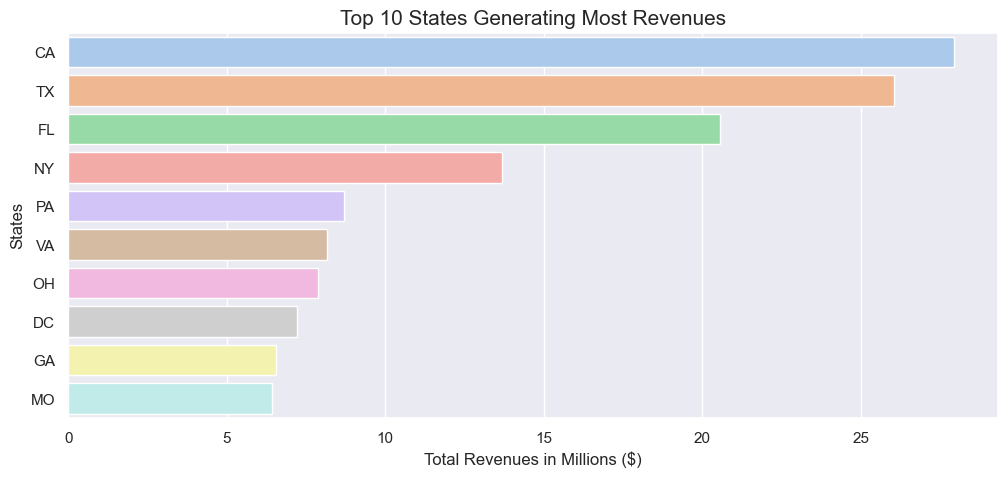

In [12]:
df_top10_customer_states = df_custsales.query("customer_state != 'Unknown Location'") \
                            .groupby('customer_state')['sales_amount'] \
                            .sum() \
                            .apply(lambda x: x / 1000000) \
                            .reset_index() \
                            .sort_values('sales_amount', ascending=False) \
                            .iloc[0:10]

plt.figure(figsize=(12, 5))
sns.barplot(
    data=df_top10_customer_states,
    x='sales_amount',
    y='customer_state'
)

plt.title("Top 10 States Generating Most Revenues", fontsize=15)
plt.xlabel("Total Revenues in Millions ($)")
plt.ylabel("States")

plt.show()

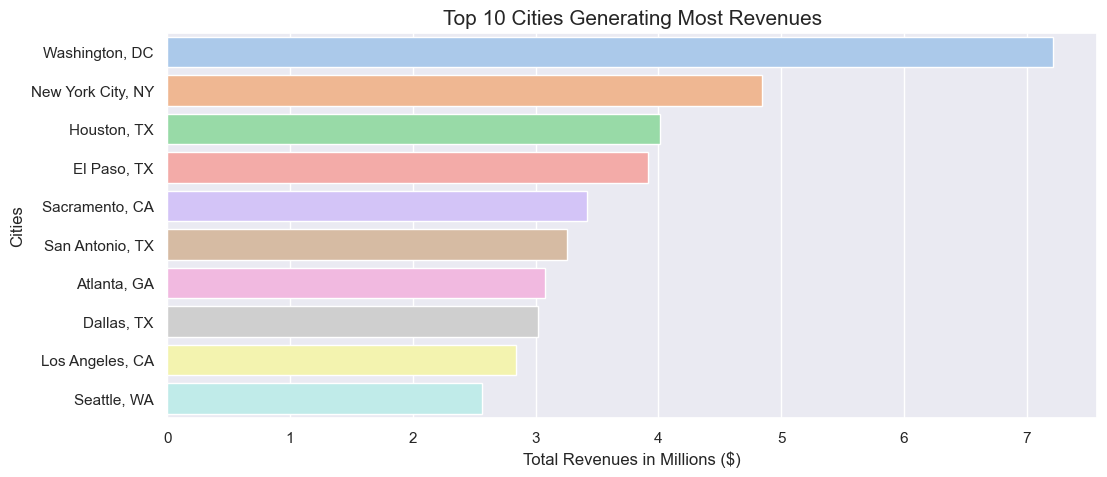

In [401]:
df_top10_customer_cities = df_custsales.query("customer_city != 'Unknown Location'") \
                            .groupby(['customer_city', 'customer_state'])['sales_amount'] \
                            .sum() \
                            .apply(lambda x: x / 1000000) \
                            .reset_index() \
                            .sort_values('sales_amount', ascending=False) \
                            .iloc[0:10]
df_top10_customer_cities['customer_location'] = df_top10_customer_cities['customer_city'].str.title() + \
                                                ", " + \
                                                df_top10_customer_cities['customer_state']

plt.figure(figsize=(12, 5))
sns.barplot(
    data=df_top10_customer_cities,
    x='sales_amount',
    y='customer_location'
)

plt.title("Top 10 Cities Generating Most Revenues", fontsize=15)
plt.xlabel("Total Revenues in Millions ($)")
plt.ylabel("Cities")

plt.show()

#### 6.2. What are the total sales amount of each sales channel?<a id='6.2'></a>

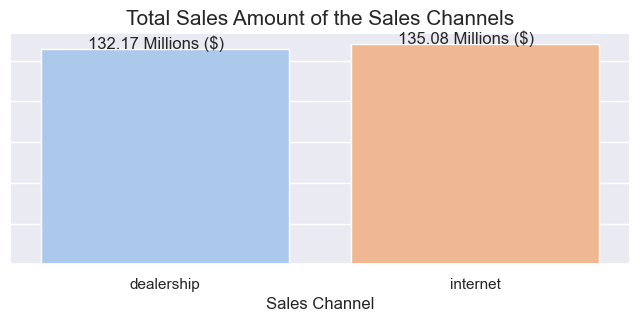

In [395]:
df_channel_avg_sales = df_custsales.groupby('channel')['sales_amount'] \
                                   .sum() \
                                   .apply(lambda x: x / 1000000) \
                                   .reset_index()

plt.figure(figsize=(8, 3))
sns.barplot(
    data=df_channel_avg_sales,
    x='channel',
    y='sales_amount'
).set(yticklabels=[])

plt.title("Total Sales Amount of the Sales Channels", fontsize=15)
plt.xlabel("Sales Channel")
plt.ylabel("")

plt.text(
    x=0-0.25, 
    y=df_channel_avg_sales.loc[0, 'sales_amount'], 
    s=str(round(df_channel_avg_sales.loc[0, 'sales_amount'], 2)) + ' Millions ($)'
)

plt.text(
    x=1-0.25, 
    y=df_channel_avg_sales.loc[1, 'sales_amount'], 
    s=str(round(df_channel_avg_sales.loc[1, 'sales_amount'], 2)) + ' Millions ($)'
)

plt.show()

#### 6.3. Where do top 5 dealerships with most sales figure located?<a id='6.3'></a>

In [105]:
df_custsales.columns

Index(['customer_id', 'product_id', 'sales_transaction_date', 'sales_amount',
       'channel', 'dealership_id', 'customer_first_name', 'customer_last_name',
       'email', 'customer_gender', 'customer_city', 'customer_state',
       'customer_postal_code', 'customer_latitude', 'customer_longitude',
       'customer_date_added', 'products_model', 'products_year',
       'product_type', 'base_msrp', 'production_start_date', 'dealership_city',
       'dealership_state', 'dealership_postal_code', 'dealership_latitude',
       'dealership_longitude', 'dealership_date_opened'],
      dtype='object')

In [106]:
df_dealerships.columns

Index(['dealership_id', 'dealership_city', 'dealership_state',
       'dealership_postal_code', 'dealership_latitude', 'dealership_longitude',
       'dealership_date_opened', 'dealership_date_closed'],
      dtype='object')

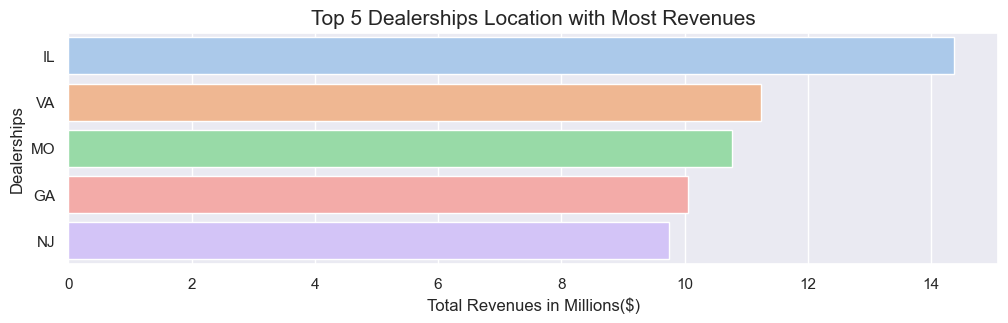

In [125]:
df_top5_dealerships = df_custsales[df_custsales['dealership_id'] != 21] \
                        .groupby(['dealership_id', 'dealership_state'])['sales_amount'] \
                        .sum() \
                        .apply(lambda x: x / 1000000) \
                        .sort_values(ascending=False) \
                        .reset_index() \
                        .iloc[0:5]

plt.figure(figsize=(12, 3))
sns.barplot(
    data=df_top5_dealerships,
    x='sales_amount',
    y='dealership_state'
)

plt.title("Top 5 Dealerships Location with Most Revenues", fontsize=15)
plt.xlabel("Total Revenues in Millions($)")
plt.ylabel("Dealerships")

plt.show()

#### 6.4. How many of sales people are there in each dealership?<a id='6.4'></a>

In [402]:
df_dealershipemp = df_employees \
                    .groupby('dealership_id')['salesperson_id'] \
                    .count() \
                    .reset_index() \
                    .sort_values('salesperson_id', ascending=False)

df_dealershipemp.rename(columns={
    'dealership_id': 'Dealership',
    'salesperson_id': 'Number of Sales People'
}, inplace=True)
df_dealershipemp.reset_index().drop('index', axis=1)

,Dealership,Number of Sales People
0,6,21
1,17,20
2,1,19
3,5,19
4,14,19
5,18,18
6,9,18
7,2,16
8,3,16
9,16,16


#### 6.5. What is the distribution of the product price?<a id='6.5'></a>

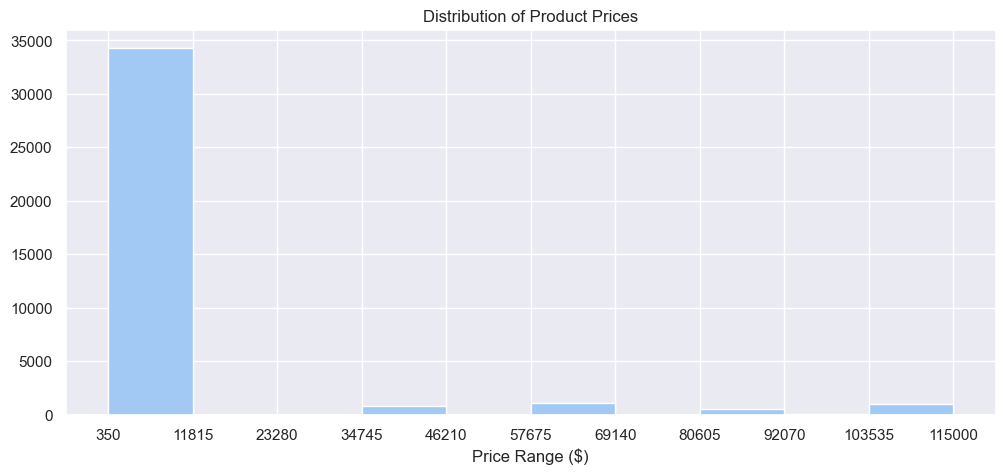

In [406]:
count, bin_edges = np.histogram(df_custsales['base_msrp'])

plt.figure(figsize=(12, 5))
df_custsales['base_msrp'].plot(kind='hist', xticks=bin_edges)

plt.title('Distribution of Product Prices')
plt.ylabel('')
plt.xlabel('Price Range ($)')

plt.show()

__Observation__: Majority products are between 350 and 11,815 US Dollars.

#### 6.6. What are the best and worst products in terms of number of orders?<a id='6.6'></a>

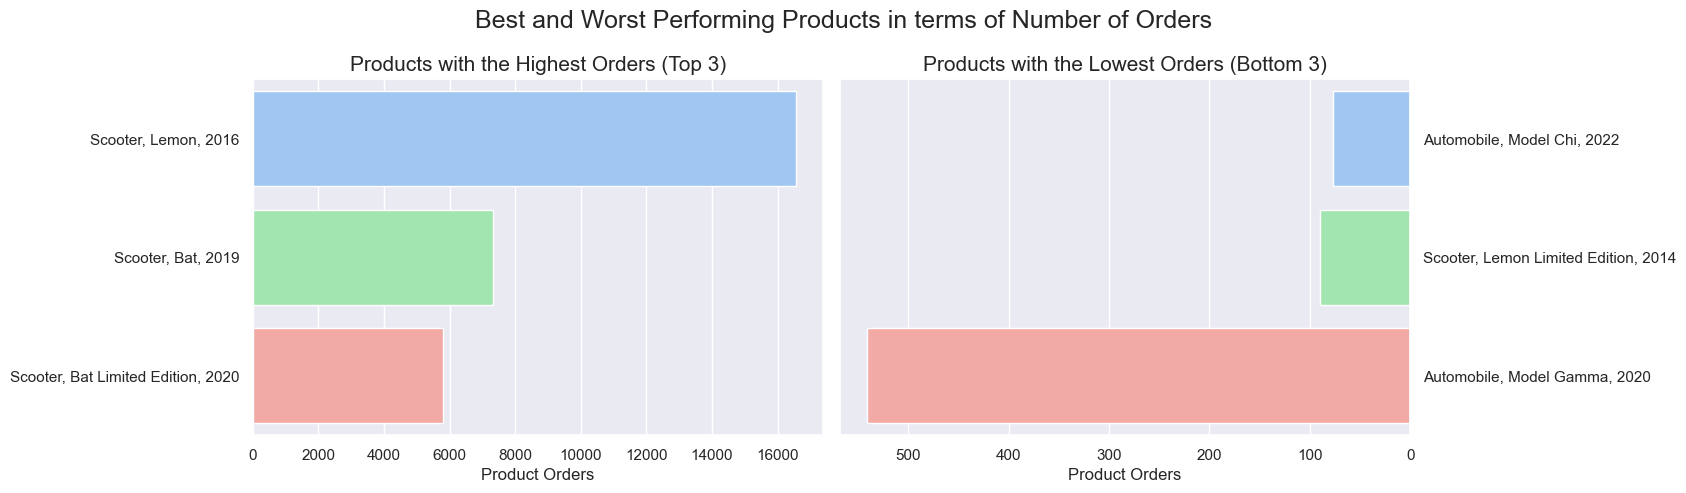

In [238]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
prod_features = ['product_type', 'products_model', 'products_year']
limit = 3
groupby_key = 'product_id'

df_prod_orders = df_custsales.groupby(prod_features)[groupby_key] \
                             .count() \
                             .reset_index() \
                             .sort_values(groupby_key, ascending=False)

df_prod_orders['purchased_product'] = df_prod_orders['product_type'].str.title() + ', ' + \
                                      df_prod_orders['products_model'] + ', ' + \
                                      df_prod_orders['products_year'].astype(str)
df_prod_orders.drop(prod_features, axis=1, inplace=True)

# tops
sns.barplot(
    x=groupby_key,
    y='purchased_product',
    data=df_prod_orders[0:limit],
    ax=ax[0]
)

ax[0].set_xlabel("Product Orders")
ax[0].set_ylabel("")
ax[0].set_title("Products with the Highest Orders (Top " + str(limit) + ")", fontsize = 15)

# bottoms
sns.barplot(
    x=groupby_key,
    y='purchased_product',
    data=df_prod_orders.iloc[-limit:].sort_values(groupby_key),
    ax=ax[1]
)

ax[1].set_xlabel("Product Orders")
ax[1].set_ylabel("")
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].tick_params(right=False)
ax[1].set_title("Products with the Lowest Orders (Bottom " + str(limit) + ")", fontsize = 15)

plt.suptitle("Best and Worst Performing Products in terms of Number of Orders", fontsize = 18)
plt.tight_layout(pad=1)
plt.show()

#### 6.7. What are the best and worst products in terms of sales revenue?<a id='6.7'></a>

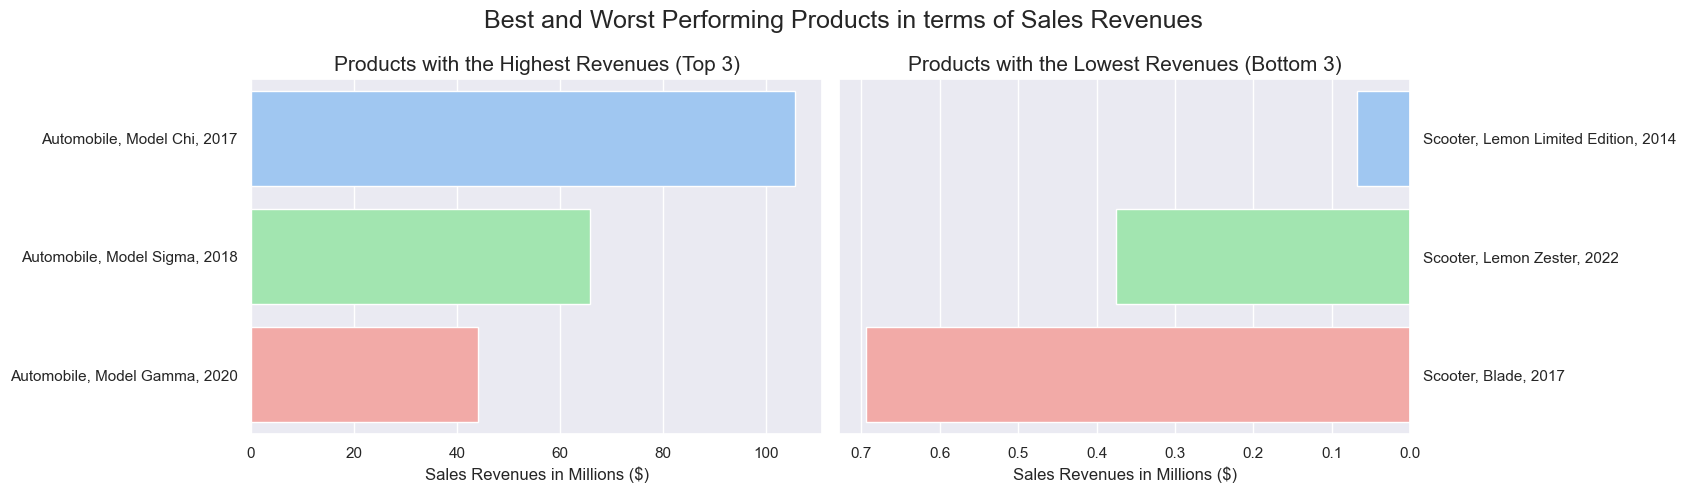

In [239]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
prod_features = ['product_type', 'products_model', 'products_year']
limit = 3
groupby_key = 'sales_amount'

df_prod_orders = df_custsales.groupby(prod_features)[groupby_key] \
                             .sum() \
                             .apply(lambda x: x / 1000000) \
                             .reset_index() \
                             .sort_values(groupby_key, ascending=False)

df_prod_orders['purchased_product'] = df_prod_orders['product_type'].str.title() + ', ' + \
                                      df_prod_orders['products_model'] + ', ' + \
                                      df_prod_orders['products_year'].astype(str)
df_prod_orders.drop(prod_features, axis=1, inplace=True)

# tops
sns.barplot(
    x=groupby_key,
    y='purchased_product',
    data=df_prod_orders[0:limit],
    ax=ax[0]
)

ax[0].set_xlabel("Sales Revenues in Millions ($)")
ax[0].set_ylabel("")
ax[0].set_title("Products with the Highest Revenues (Top " + str(limit) + ")", fontsize = 15)

# bottoms
sns.barplot(
    x=groupby_key,
    y='purchased_product',
    data=df_prod_orders.iloc[-limit:].sort_values(groupby_key),
    ax=ax[1]
)

ax[1].set_xlabel("Sales Revenues in Millions ($)")
ax[1].set_ylabel("")
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].tick_params(right=False)
ax[1].set_title("Products with the Lowest Revenues (Bottom " + str(limit) + ")", fontsize = 15)

plt.suptitle("Best and Worst Performing Products in terms of Sales Revenues", fontsize = 18)
plt.tight_layout(pad=1)
plt.show()

#### 6.8. What are numbers of sales transactions made through the years?<a id='6.8'></a>

In [14]:
# Add additional column to display 'year' that sales have been made
df_custsales['sales_transaction_year'] = df_custsales['sales_transaction_date'].dt.year

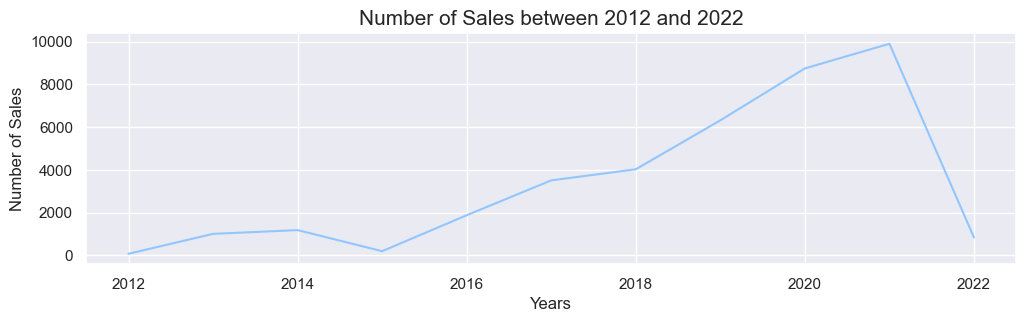

In [300]:
df_yearly_sales = df_custsales.groupby('sales_transaction_year')['product_id'] \
                              .count() \
                              .reset_index()

plt.figure(figsize=(12, 3))
sns.lineplot(x='sales_transaction_year', y='product_id', data=df_yearly_sales)

plt.title("Number of Sales between 2012 and 2022", fontsize=15)
plt.xlabel("Years")
plt.ylabel("Number of Sales")

plt.show()

__Observation__: With a dip in 2015, increasing numbers of sales have been made every year until 2021.

#### 6.9. What are average amounts of sales made through the years?<a id='6.9'></a>

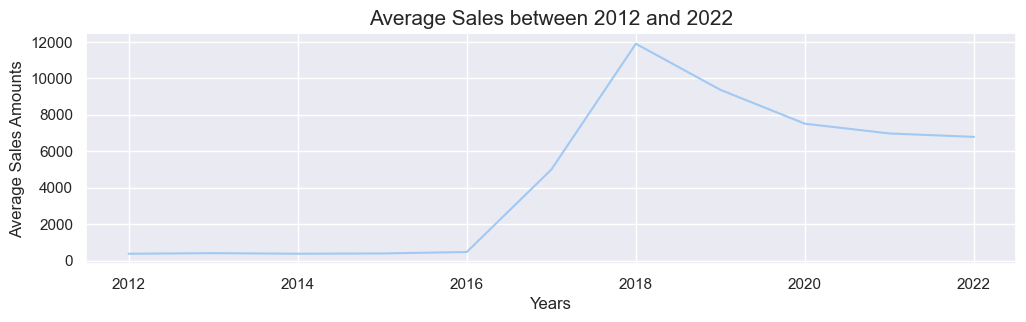

In [16]:
df_yearly_sales_amount = df_custsales.groupby('sales_transaction_year')['sales_amount'] \
                                     .mean() \
                                     .reset_index()

plt.figure(figsize=(12, 3))
sns.lineplot(x='sales_transaction_year', y='sales_amount', data=df_yearly_sales_amount)

plt.title("Average Sales between 2012 and 2022", fontsize=15)
plt.xlabel("Years")
plt.ylabel("Average Sales Amounts")

plt.show()

#### 6.10. How many of employees have been hired though the years?<a id='6.10'></a>

In [14]:
# Add additional column to display 'year' that employees have been hired
df_employees['salesperson_hire_year'] = df_employees['salesperson_hire_date'].dt.year

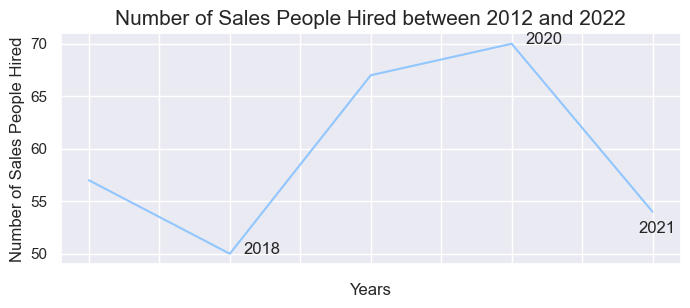

In [356]:
df_hired_years = df_employees.groupby('salesperson_hire_year')['salesperson_id'] \
                             .nunique() \
                             .reset_index()

plt.figure(figsize=(8, 3))
sns.lineplot(
    x='salesperson_hire_year', 
    y='salesperson_id',
    data=df_hired_years
).set(xticklabels=[])

plt.title("Number of Sales People Hired between 2012 and 2022", fontsize=15)
plt.xlabel("Years")
plt.ylabel("Number of Sales People Hired")

plt.annotate(text='2018', xy=(2018.1, 50))
plt.annotate(text='2020', xy=(2020.1, 70))
plt.annotate(text='2021', xy=(2020.9, 52))

plt.show()

__Observations__: With limited number of information (before 2017), hirings have been increased until 2020. After that it has gone down. Between sales trends (in terms of numbers or average revenues) and employees hiring trends, it is not clear that what causes these trends or whether one trend was followed by another with provided data. 

#### 6.11. Which emails are being sent out the most?<a id='6.11'></a>

In [386]:
# top 5 email subjects customers received
df_emails \
.groupby('email_subject')['email_id'] \
.count() \
.reset_index() \
.sort_values('email_id', ascending=False)[0:5]

,email_subject,email_id
2,"A New Year, And Some New EVs",47437
7,Save the Planet with some Holiday Savings.,46739
4,Black Friday. Green Cars.,41399
11,We Really Outdid Ourselves this Year,36768
0,25% off all EVs. It's a Christmas Miracle!,36012


#### 6.12. How emails help with the marketing or get more customers purchase?<a id='6.12'></a>

In [385]:
pd.DataFrame({
    'rate_of_emails_opened': [df_emails['email_opened'].value_counts()['t']/df_emails.shape[0]],
    'rate_of_emails_clicked': [df_emails['email_clicked'].value_counts()['t']/df_emails.shape[0]]
})

,rate_of_emails_opened,rate_of_emails_clicked
0,0.199874,0.024067


__Observation__: While customers may purchase the products after receiving some emails such as seasonal discount, rate of customers who actually opened or viewed the emails are extremely low, which is less than 1 percent each. Thus, most of the customers purchases may not be related to emails they have received. Nevertheless, emails can still create an awareness of the existing or new products.

#### 6.13. What is the distribution of customer product review score?<a id='6.13'></a>

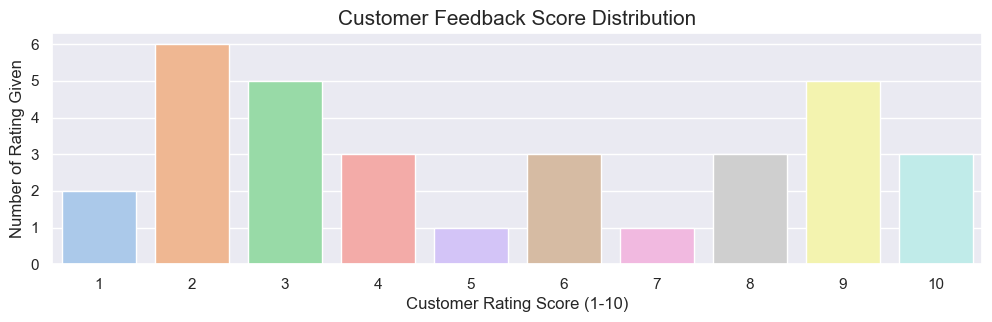

In [423]:
df_ratings = df_customer_survey.groupby('customer_rating')['customer_feedback'] \
                               .count() \
                               .reset_index()

plt.figure(figsize=(12, 3))
sns.barplot(
    data=df_ratings,
    x='customer_rating',
    y='customer_feedback'
)

plt.title("Customer Feedback Score Distribution", fontsize=15)
plt.xlabel("Customer Rating Score (1-10)")
plt.ylabel("Number of Rating Given")

plt.show()

__Observation__: Majority of the customers gave below average ratings. However, there are very few records of the feedbacks where many should be done in the future to get more valuable feedbacks.

## 7. Customer Segmentation with RFM Analysis and K-Means Clustering<a id='rfm'></a>

### 7.1 Calculating RFM<a id='7.'></a>

RFM analysis will be done in this section to quantitatively rank and group customers based on the recency, frequency, and monetary to support the marketing strategy to carry out targeted traditional marketing campaigns and digital advertisements.
- __Recency__: 
    - How recently have the customers purchased the products?
    - To calculate the number days between present date and date of last purchase each customer
    - For the present date, one day after last transaction date of all the transaction dates will be used instead of actual present date
- __Frequency__: 
    - How frquently have the customers purchased the products?
    - To calculate the numnber of orders or purchases of each customer
- __Monetary__: 
    - How much have the customers spent the money to purchase the products?
    - To calculate the sum of purchase prices (total money spent) for each customer

In [15]:
df_custsales.columns

Index(['customer_id', 'product_id', 'sales_transaction_date', 'sales_amount',
       'channel', 'dealership_id', 'customer_first_name', 'customer_last_name',
       'email', 'customer_gender', 'customer_city', 'customer_state',
       'customer_postal_code', 'customer_latitude', 'customer_longitude',
       'customer_date_added', 'products_model', 'products_year',
       'product_type', 'base_msrp', 'production_start_date', 'dealership_city',
       'dealership_state', 'dealership_postal_code', 'dealership_latitude',
       'dealership_longitude', 'dealership_date_opened',
       'sales_transaction_year'],
      dtype='object')

In [66]:
#
# recency
df_recency = df_custsales.groupby('customer_id')['sales_transaction_date'] \
                         .max() \
                         .reset_index() \
                         .rename(columns={'sales_transaction_date': 'last_purchase_date'})

df_recency['recency'] = (df_recency['last_purchase_date'].max()
                         + pd.Timedelta(days=1)
                         - df_recency['last_purchase_date']).dt.days

#
# frequency
df_frequency = df_custsales.groupby('customer_id')['product_id'] \
                           .count() \
                           .reset_index() \
                           .rename(columns={'product_id': 'frequency'})

#
# monetary
df_monetary = df_custsales.groupby('customer_id')['sales_amount'] \
                          .sum() \
                          .reset_index() \
                          .rename(columns={'sales_amount': 'monetary'})

# 
# merge rfm data
df_rfm = df_recency.merge(df_frequency, on='customer_id') \
                   .merge(df_monetary, on='customer_id') \
                   .drop('last_purchase_date', axis=1)

In [67]:
df_rfm.head()

,customer_id,recency,frequency,monetary
0,1,682,1,479.992
1,4,98,1,314.991
2,5,1871,1,499.990
3,6,2133,1,499.990
4,7,37,3,66499.980


### 7.2. Checking and Handling Skewed Distribution for RFM<a id='7.2'></a>

In [105]:
# function to draw distribuion charts for RFM
def plot_rfm_distribution_charts(df):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
    
    sns.histplot(df['recency'], kde=True, ax=ax[0])
    sns.histplot(df['frequency'], kde=True, ax=ax[1])
    sns.histplot(df['monetary'], kde=True, ax=ax[2])
    
    plt.suptitle('Distribution of Recency, Frequency, and Monetary', fontsize = 15)
    plt.tight_layout(pad = 1)
    plt.show()

#### Checking for Any Skewed Distribution

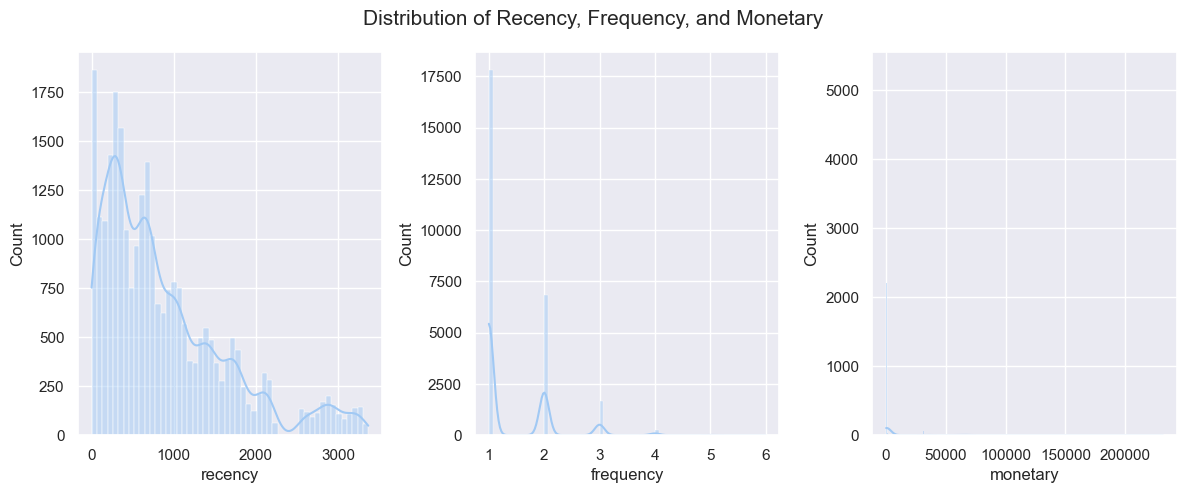

In [80]:
plot_rfm_distribution_charts(df_rfm)

__Observation__: distribution for monetary is heavily skewed.

#### Handling Skewed Distribtuion

- Nth root transformation: result seems not to be changed much after n=10, so this will be used
- Log and box cos transformations were also tested, and received good results, however, a lot of frequency values become '0'

In [114]:
df_rfm_nth_transformed = df_rfm.copy()

for feature in df_rfm_nth_transformed.columns[2:]:
    df_rfm_nth_transformed[feature] = np.power(df_rfm_nth_transformed[feature], 1/10)
    
df_rfm_nth_transformed.head()

,customer_id,recency,frequency,monetary
0,1,682,1.000000,1.854058
1,4,98,1.000000,1.777583
2,5,1871,1.000000,1.861642
3,6,2133,1.000000,1.861642
4,7,37,1.116123,3.035863


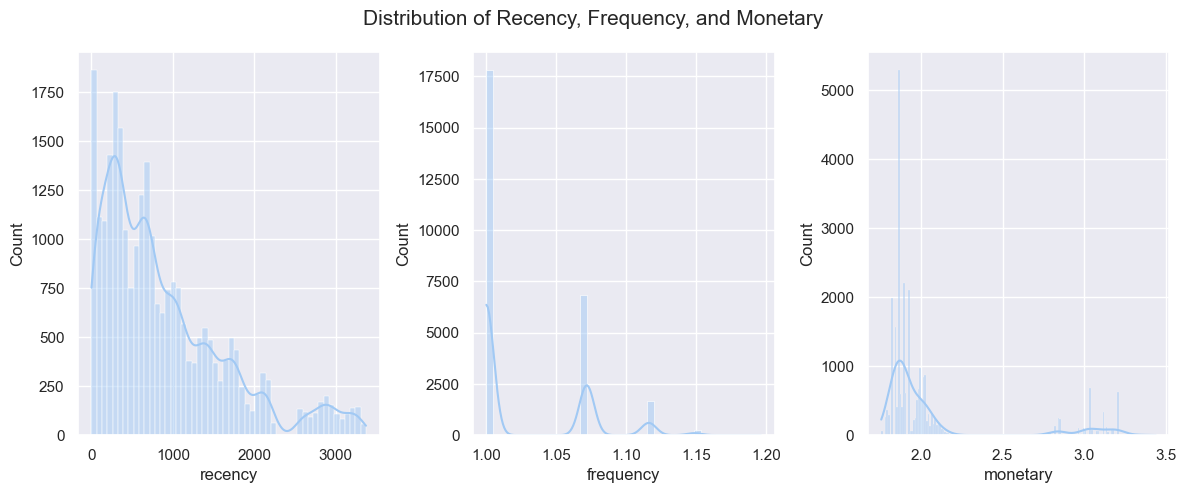

In [115]:
plot_rfm_distribution_charts(df_rfm_nth_transformed)

### 7.3. K-Means Clustering<a id='7.3'></a>

#### Data Normalization

Normalization is done on the rfm dataset to help mathematical-based algorithms to interpret features with different magnitudes and distributions equally. 

In [163]:
rfm_scaled = StandardScaler().fit_transform(df_rfm_nth_transformed.values[:, 1:])

#### Finding Optimum Value for K

__Silhouette Scores__ will be used to find the optimum number of clusters

In [164]:
silhouette_scores = []
for k in range(3, 10):
    clusterer = KMeans(n_clusters=k)
    preds = clusterer.fit_predict(rfm_scaled)
    centers = clusterer.cluster_centers_

    silhouette_scores.append(silhouette_score(rfm_scaled, preds))

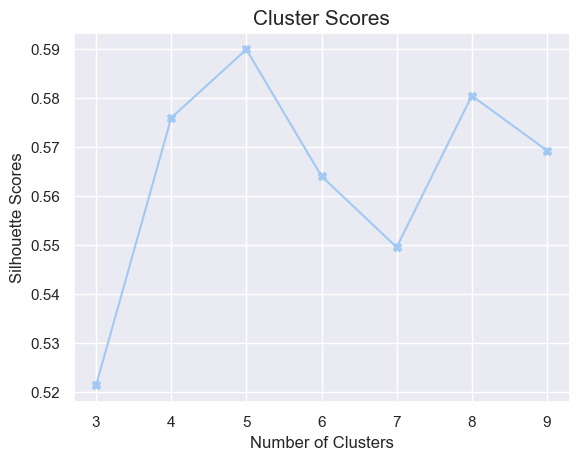

In [165]:
plt.plot(n_clusters, silhouette_scores, marker='X')

plt.title('Cluster Scores', fontsize=15)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')

plt.show()

#### Modeling

In [169]:
k_means_model = KMeans(n_clusters=5, random_state=seed)

# train the model
k_means_model.fit(rfm_scaled)

# add the cluster column to original rfm dataframe
df_rfm['cluster_label'] = k_means_model.labels_

In [172]:
df_rfm.sample(10)

,customer_id,recency,frequency,monetary,cluster_label
25321,47679,1102,2,999.980,2
24743,46602,1430,1,499.990,3
21174,39909,772,1,399.992,0
10106,19206,1310,1,499.990,0
19706,37253,2152,1,499.990,3
17128,32368,1058,1,399.992,0
25731,48461,413,1,599.990,0
8359,15935,1765,1,699.990,3
25167,47380,196,2,86199.991,1
19476,36816,249,1,499.990,0


### 7.4. RFM with Clustering<a id='7.4'></a>

In [189]:
df_rfm.groupby('cluster_label') \
      .agg({
          'recency': 'mean',
          'frequency': 'mean',
          'monetary': 'mean',
          'customer_id': 'count'
        }) \
      .round(1) \
      .reset_index() \
      .rename(columns={
          'recency': 'Avg Recency',
          'frequency': 'Avg Frequency',
          'monetary': 'Avg Monetary',
          'customer_id': 'Num of Customer'
      })

,cluster_label,Avg Recency,Avg Frequency,Avg Monetary,Num of Customer
0,0,566.2,1.0,542.8,11147
1,1,517.1,2.4,78823.3,1674
2,2,573.8,2.3,1199.0,6859
3,3,2110.7,1.1,491.7,5295
4,4,720.4,1.0,73328.7,1615


### 7.5. Segmenting the Customers<a id='7.5'></a>

Customers will segmented into following categories as per RFM analysis:
- __Cluster 0__
    - Categorized as __relatively new and low spending group__ 
    - Spending may be low (most likely due to purchasing more affordable product models) but with most numbers of customers
    - Putting marketing efforts on them for more frequent purchase can make the business earn huge profits
- __Cluster 1__
    - Categorized as __new and promising group__
    - These customers are new yet most frequently purchased the product with biggest spending
    - They have many potentials to be the loyal customers
    - Getting the right feedback and keeping them is indispensable
- __Cluster 2__: 
    - Categorized as __(potential) loyalist and slightly low spending group__
    - Loyalty programs can have more added benefits towards these customers
- __Cluster 3__: 
    - Categorized as __about to sleep or sleeping group__
    - These customers last spent on the products some times ago with lowest spending but still are in decent amount of numbers, so follow ups by sales team will be necessary
- __Cluster 4__: 
    - Categorized as __relatively new and highest spending group__ on average number of purchase
    - Despite being the group with lowest customer numbers, they can be the most affluent customers
    - Special member programs can be considered as part of business and marketing strategy